In [1]:
import os
import sys
sys.path.append("..")

import warnings
warnings.filterwarnings('ignore')

from string import ascii_uppercase, ascii_lowercase
alphabet_list = list(ascii_uppercase+ascii_lowercase)

from utils.pdb_processing import seq_to_pdb, get_pdb_chains
from utils.protein_mpnn import score_complex, protein_mpnn, plot_amino_acid_probs
from utils.chroma_sample import binder_sample

In [2]:
# Define the parameters
len_binder = 15 # Define the length of the binder
receptor_pdb = '../data/4LWV.pdb' # Receptor PDB file
receptor_chains = get_pdb_chains(receptor_pdb) # Get the chains of the receptor
design_chain = alphabet_list[len(receptor_chains)] # Get the chain of the binder
print(f"Design chain: {design_chain}")

Design chain: B


In [3]:
# Sample a binder pose for a given receptor PDB file
binder_sample(
    input_pdb=receptor_pdb, # input file
    len_binder=len_binder, # length of the binder
    output_pdb='output_dir/4LWV_design.pdb', # output file
    len_chains=len(receptor_chains) # number of chains in the receptor
)

Using cached data from /tmp/chroma_weights/90e339502ae6b372797414167ce5a632/weights.pt
Loaded from cache
Using cached data from /tmp/chroma_weights/03a3a9af343ae74998768a2711c8b7ce/weights.pt
Loaded from cache


Integrating SDE:   0%|          | 0/500 [00:00<?, ?it/s]

Potts Sampling:   0%|          | 0/500 [00:00<?, ?it/s]

Sequential decoding:   0%|          | 0/100 [00:00<?, ?it/s]

In [4]:
seqs, amino_acid_probs = protein_mpnn(
    input_pdb='output_dir/4LWV_design.pdb', 
    batch_size=8, 
    design_chain=design_chain, 
    temperature=0.1)

Generating sequences...
>4LWV_design, score=1.6815, fixed_chains=['A'], designed_chains=['B'], model_name=v_48_020
EEELKKKLEELFKKL



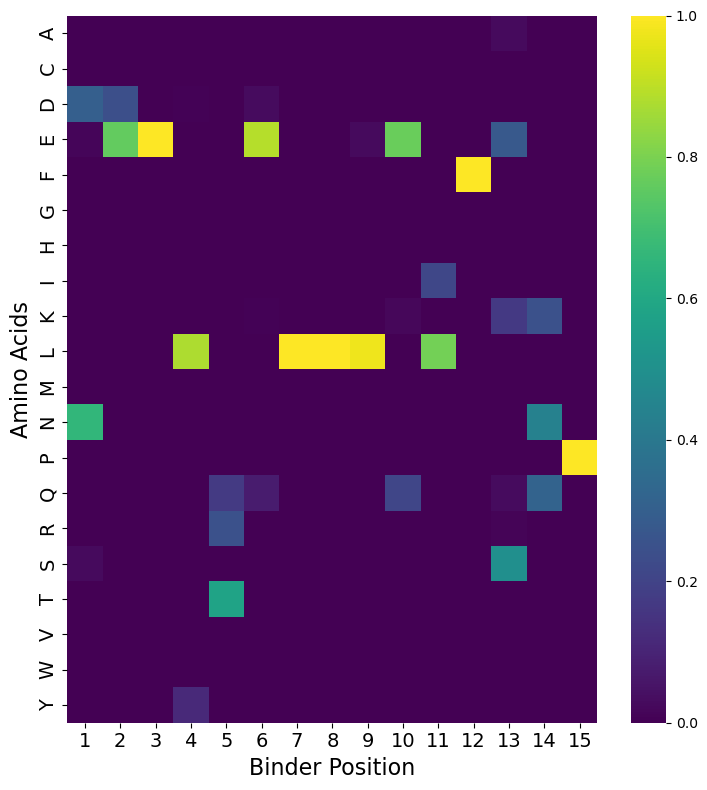

In [5]:
# Plot the amino acid probabilities for the designed peptide
plot_amino_acid_probs(amino_acid_probs, len_binder, output_file='output_dir/amino_acid_probs.png')

In [6]:
# Get the best sequence based on the MPNN score
best_seq = min(seqs, key=lambda x: x['score'])
print(f"Best sequence: {best_seq}")

Best sequence: {'sequence': 'NEELTELLLELFSQP', 'score': '1.2616'}


In [7]:
# Save the best sequence to a PDB file
seq_to_pdb(
    seq=best_seq['sequence'],
    pdb='output_dir/4LWV_design.pdb',
    output_pdb='output_dir/4LWV_design_best.pdb',
    design_chain=design_chain,
    minimize=False,
    remove_hydrogens=True
)

In [8]:
# Score the complex
score_complex(
    input_pdb='output_dir/4LWV_design_best.pdb',
    design_chain=design_chain,
)

1.2845626